In [1]:
#Importing the libraries which are required for the Case Study
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Getting the data from the CSV file
loan_data = pd.read_csv("loan.csv")

In [3]:
# Getting the first five rows of the data from the CSV file
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
#Getting the exact rows and column count for the file
loan_data.shape

(39717, 111)

In [5]:
#Getting the count of null values from the CSV file
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

# There are columns which have the null values. Trying the remove them

In [6]:
loan_data.dropna(axis = 1, how = 'all', inplace = True)

In [7]:
#Checking the dataset after removing the columns with null values
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [8]:
# checking the shape of dataset after removing the columns with null values
loan_data.shape

(39717, 57)

# It seems there are various columns with only few or single values, let us try to remove them

In [9]:
#Dropping the columns with very minimal information
loan_data.drop(['collections_12_mths_ex_med', "policy_code",'application_type',"pub_rec_bankruptcies", "tax_liens","acc_now_delinq"],axis = 1, inplace = True)

In [10]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths,delinq_amnt
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,0


In [11]:
#checking the number of columns left after cleaning the data
loan_data.shape

(39717, 51)

# There are some columns which corresponds to the loan post approval

In [12]:
#Our Main motive is to analyze the potential loan defaulters before the loan approval.
#We can remove the columns corresponding to post approval.

In [13]:
#Post Approval features are as below:-

#recoveries
#total_rec_late_fee
#total_rec_int
#total_rec_prncp
#last_pymnt_d
#last_pymnt_amnt
#next_pymnt_d
#last_credit_pull_d

#There are few IDs and othe misc values also in the sheet which doesn't seem to add any value to the analysis, let us remove them as well. They are as below:-

#id
#member_id
#url
#zip_code
#addr_state
#title
#emp_title
#addr_state

In [14]:
loan_data.drop(['id', "member_id", 'url', 'zip_code', 'addr_state', 'title', 'emp_title', 'addr_state'], axis = 1, inplace = True)

In [15]:
loan_data.shape

(39717, 44)

In [16]:
loan_data.drop(['collection_recovery_fee', 'recoveries', 'total_rec_late_fee','total_rec_int', 'total_rec_prncp', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d' ], axis = 1, inplace = True)

In [17]:
loan_data.shape

(39717, 35)

In [18]:
loan_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'desc', 'purpose', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'chargeoff_within_12_mths', 'delinq_amnt'],
      dtype='object')

In [19]:
#There are few more columns which can be removed as below:-
#These all also seem to be post approval columns hence removing them:-
    
#chargeoff_within_12_mths
#revol_bal
#out_prncp
#desc
#funded_amnt

In [20]:
loan_data.drop(['chargeoff_within_12_mths', 'revol_bal', 'out_prncp', 'desc','funded_amnt' ], axis = 1, inplace = True)

In [21]:
loan_data.shape

(39717, 30)

In [22]:
loan_data.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'delinq_amnt'],
      dtype='object')

In [23]:
# I think there are still few Columns which don't add value to the analysis, list is as below:-

#out_prncp_inv
#total_pymnt_inv
#mths_since_last_record
#mths_since_last_delinq

In [24]:
loan_data.drop(['out_prncp_inv', 'total_pymnt_inv', 'mths_since_last_record', 'mths_since_last_delinq' ], axis = 1, inplace = True)

In [25]:
loan_data.shape

(39717, 26)

In [26]:
# We will also remove the records regarding any of the current loans as that would not add add to the analysis
loan_data = loan_data[loan_data.loan_status != 'Current']

In [27]:
loan_data.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [28]:
#Checking the shape of the data after remove current loan data
loan_data.shape

(38577, 26)

In [29]:
def defaulter(row):
    if row["loan_amnt"]<=row["total_pymnt"]:
        return "No"
    else:
        return "Yes"

In [30]:
loan_data["is_defaulter"]=loan_data.apply (lambda row: defaulter(row), axis=1)

In [31]:
loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,initial_list_status,total_pymnt,delinq_amnt,is_defaulter
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,Jan-85,1,3,0,83.70%,9,f,5863.155187,0,No
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,Apr-99,5,3,0,9.40%,4,f,1008.710000,0,Yes
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,Nov-01,2,2,0,98.50%,10,f,3005.666844,0,No
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,Feb-96,1,10,0,21%,37,f,12231.890000,0,No
5,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,...,Nov-04,3,9,0,28.30%,12,f,5632.210000,0,No


In [32]:
loan_data["revol_util"]=loan_data["revol_util"].str.replace("%","").astype(float)
loan_data["int_rate"]=loan_data["int_rate"].str.replace("%","").astype(float)
loan_data["term"]=loan_data["term"].str.replace("months","").astype(int)

In [33]:
loan_data.rename(columns = {'term':'term_in_months'}, inplace = True)

In [34]:
loan_data.head(10)

,loan_amnt,funded_amnt_inv,term_in_months,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,initial_list_status,total_pymnt,delinq_amnt,is_defaulter
0,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,...,Jan-85,1,3,0,83.7,9,f,5863.155187,0,No
1,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,...,Apr-99,5,3,0,9.4,4,f,1008.710000,0,Yes
2,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,...,Nov-01,2,2,0,98.5,10,f,3005.666844,0,No
3,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,...,Feb-96,1,10,0,21.0,37,f,12231.890000,0,No
5,5000,5000.0,36,7.90,156.46,A,A4,3 years,RENT,36000.0,...,Nov-04,3,9,0,28.3,12,f,5632.210000,0,No
6,7000,7000.0,60,15.96,170.08,C,C5,8 years,RENT,47004.0,...,Jul-05,1,7,0,85.6,11,f,10110.840000,0,No
7,3000,3000.0,36,18.64,109.43,E,E1,9 years,RENT,48000.0,...,Jan-07,2,4,0,87.5,4,f,3939.135294,0,No
8,5600,5600.0,60,21.28,152.39,F,F2,4 years,OWN,40000.0,...,Apr-04,2,11,0,32.6,13,f,646.020000,0,Yes
9,5375,5350.0,60,12.69,121.45,B,B5,< 1 year,RENT,15000.0,...,Sep-04,0,2,0,36.5,3,f,1476.190000,0,Yes
10,6500,6500.0,60,14.65,153.45,C,C3,5 years,OWN,72000.0,...,Jan-98,2,14,0,20.6,23,f,7678.017673,0,No


In [35]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt_inv      38577 non-null  float64
 2   term_in_months       38577 non-null  int32  
 3   int_rate             38577 non-null  float64
 4   installment          38577 non-null  float64
 5   grade                38577 non-null  object 
 6   sub_grade            38577 non-null  object 
 7   emp_length           37544 non-null  object 
 8   home_ownership       38577 non-null  object 
 9   annual_inc           38577 non-null  float64
 10  verification_status  38577 non-null  object 
 11  issue_d              38577 non-null  object 
 12  loan_status          38577 non-null  object 
 13  pymnt_plan           38577 non-null  object 
 14  purpose              38577 non-null  object 
 15  dti                  38577 non-null 

In [36]:
encoded_loan_data = pd.get_dummies(loan_data, columns = ['home_ownership', 'verification_status','loan_status','is_defaulter'])


In [37]:
encoded_loan_data.head()

,loan_amnt,funded_amnt_inv,term_in_months,int_rate,installment,grade,sub_grade,emp_length,annual_inc,issue_d,...,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,loan_status_Charged Off,loan_status_Fully Paid,is_defaulter_No,is_defaulter_Yes
0,5000,4975.0,36,10.65,162.87,B,B2,10+ years,24000.0,Dec-11,...,0,0,1,0,0,1,0,1,1,0
1,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,30000.0,Dec-11,...,0,0,1,0,1,0,1,0,0,1
2,2400,2400.0,36,15.96,84.33,C,C5,10+ years,12252.0,Dec-11,...,0,0,1,1,0,0,0,1,1,0
3,10000,10000.0,36,13.49,339.31,C,C1,10+ years,49200.0,Dec-11,...,0,0,1,0,1,0,0,1,1,0
5,5000,5000.0,36,7.90,156.46,A,A4,3 years,36000.0,Dec-11,...,0,0,1,0,1,0,0,1,1,0


In [38]:
encoded_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            38577 non-null  int64  
 1   funded_amnt_inv                      38577 non-null  float64
 2   term_in_months                       38577 non-null  int32  
 3   int_rate                             38577 non-null  float64
 4   installment                          38577 non-null  float64
 5   grade                                38577 non-null  object 
 6   sub_grade                            38577 non-null  object 
 7   emp_length                           37544 non-null  object 
 8   annual_inc                           38577 non-null  float64
 9   issue_d                              38577 non-null  object 
 10  pymnt_plan                           38577 non-null  object 
 11  purpose                     

In [39]:
encoded_loan_data.corr()

,loan_amnt,funded_amnt_inv,term_in_months,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,loan_status_Charged Off,loan_status_Fully Paid,is_defaulter_No,is_defaulter_Yes
loan_amnt,1.000000,0.937922,0.346650,0.301265,0.932260,0.268999,0.062436,-0.031951,0.012940,0.177200,...,-0.002637,-0.035756,-0.151432,-0.316177,-0.084761,0.415840,0.059463,-0.059463,-0.130026,0.130026
funded_amnt_inv,0.937922,1.000000,0.343922,0.297473,0.905464,0.251981,0.070663,-0.038171,-0.002800,0.162738,...,-0.020607,-0.030967,-0.144076,-0.333991,-0.057987,0.409861,0.037781,-0.037781,-0.033757,0.033757
term_in_months,0.346650,0.343922,1.000000,0.440206,0.090456,0.043866,0.076182,0.007270,0.047708,0.046162,...,-0.027612,-0.012900,-0.090849,-0.234153,0.047042,0.205602,0.173487,-0.173487,-0.186652,0.186652
int_rate,0.301265,0.297473,0.440206,1.000000,0.277203,0.048899,0.110913,0.158479,0.133362,0.006022,...,0.001486,-0.019041,0.074244,-0.179994,0.012230,0.180353,0.211390,-0.211390,-0.141451,0.141451
installment,0.932260,0.905464,0.090456,0.277203,1.000000,0.267842,0.052038,-0.019755,0.011014,0.172893,...,0.003938,-0.033017,-0.117908,-0.266514,-0.094036,0.371578,0.027153,-0.027153,-0.017671,0.017671
annual_inc,0.268999,0.251981,0.043866,0.048899,0.267842,1.000000,-0.121530,0.022229,0.035465,0.156927,...,0.001990,-0.044518,-0.172348,-0.104468,-0.004524,0.115509,-0.040867,0.040867,0.015622,-0.015622
dti,0.062436,0.070663,0.076182,0.110913,0.052038,-0.121530,1.000000,-0.033347,0.002178,0.287849,...,-0.015283,-0.003923,0.025173,-0.036461,-0.057875,0.092790,0.045078,-0.045078,-0.036075,0.036075
delinq_2yrs,-0.031951,-0.038171,0.007270,0.158479,-0.019755,0.022229,-0.033347,1.000000,0.008733,0.011649,...,0.017393,0.006645,-0.020178,-0.008553,0.005915,0.003598,0.020096,-0.020096,-0.006917,0.006917
inq_last_6mths,0.012940,-0.002800,0.047708,0.133362,0.011014,0.035465,0.002178,0.008733,1.000000,0.093434,...,0.009886,0.003952,-0.080276,-0.009803,-0.004676,0.014803,0.071878,-0.071878,-0.064060,0.064060
open_acc,0.177200,0.162738,0.046162,0.006022,0.172893,0.156927,0.287849,0.011649,0.093434,1.000000,...,-0.004562,-0.020296,-0.191264,-0.052859,-0.043111,0.096497,-0.009140,0.009140,-0.006717,0.006717


In [40]:
number_of_yes= [loan_data["is_defaulter"].value_counts().Yes]

In [41]:
number_of_yes

[6096]

<AxesSubplot:xlabel='home_ownership', ylabel='Count'>

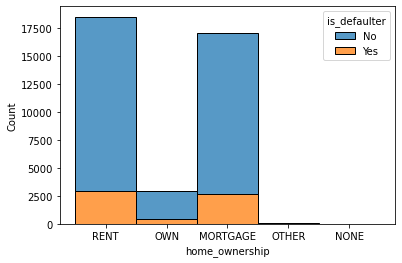

In [42]:
sns.histplot(binwidth=0.5, x="home_ownership", hue="is_defaulter", data=loan_data, stat="count", multiple="stack")

<AxesSubplot:xlabel='verification_status', ylabel='Count'>

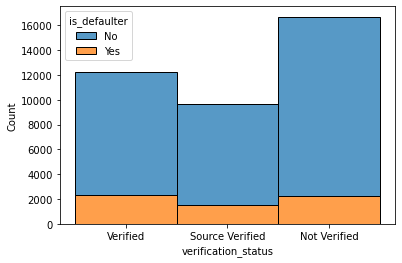

In [43]:
sns.histplot(binwidth=0.5, x="verification_status", hue="is_defaulter", data=loan_data, stat="count", multiple="stack")

<AxesSubplot:xlabel='is_defaulter', ylabel='annual_inc'>

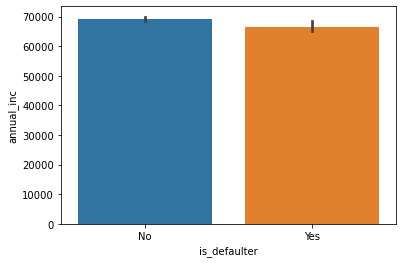

In [44]:
sns.barplot(data = loan_data, x = "is_defaulter", y = "annual_inc")

<AxesSubplot:xlabel='is_defaulter', ylabel='installment'>

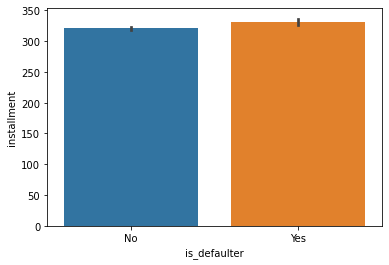

In [45]:
sns.barplot(data = loan_data, x = "is_defaulter", y = "installment")

<AxesSubplot:xlabel='is_defaulter', ylabel='loan_amnt'>

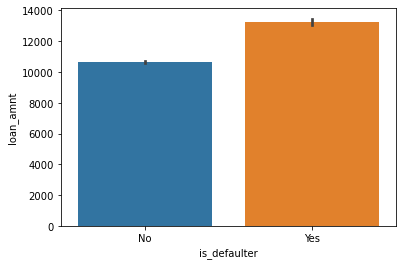

In [46]:
sns.barplot(data = loan_data, x = "is_defaulter", y = "loan_amnt")

(array([5.750e+03, 1.629e+04, 9.512e+03, 3.993e+03, 1.585e+03, 6.260e+02,
        3.300e+02, 1.430e+02, 8.600e+01, 9.200e+01, 3.000e+01, 2.800e+01,
        1.200e+01, 1.600e+01, 6.000e+00, 6.000e+00, 8.000e+00, 5.000e+00,
        6.000e+00, 5.000e+00, 2.000e+00, 5.000e+00, 1.000e+00, 6.000e+00,
        4.000e+00, 7.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 5.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 5.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

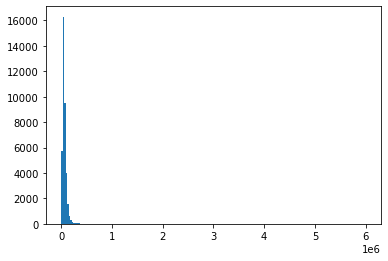

In [53]:
plt.hist(loan_data["annual_inc"], bins = 200)